In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import time

In [ ]:
demandPath = "/content/drive/MyDrive/demand"
sourcesPath = "/content/drive/MyDrive/sources"

demandCsv = os.listdir(demandPath)
print(len(demandCsv))
sourcesCsv = os.listdir(sourcesPath)
print(len(sourcesCsv))

1116
1116


In [ ]:
# Demand dataframe
demandDf = pd.DataFrame()

for i in range(1116):
    try:
        df = pd.read_csv(os.path.join(demandPath, demandCsv[i]))
        df = df.drop(288)
        df = df.fillna(0)
        df.columns = df.columns.str.lower()
        demandDf = pd.concat([demandDf, df], ignore_index=True)
    except:
        continue
demandDf.head()

,time,day ahead forecast,hour ahead forecast,current demand
0,00:00,23451.0,22917.0,22992.0
1,00:05,22408.0,22739.0,22890.0
2,00:10,22408.0,22739.0,22812.0
3,00:15,22408.0,22739.0,22736.0
4,00:20,22408.0,22454.0,22657.0


In [ ]:
demandDf.to_csv('demand.csv', index=False)

SOURCES DF. 
THERE ARE DAYS THAT AT THE END SOME VALUES (WHOLE LOGS) ARE MISSING (MAX 10) WE REPLACE THEM WITH THE LAST KNOWN VALUE FOR THAT DAY SINCE AT THE END OF THE DAY (DEMAND=> SOURCES) DOESN'T FLUCTUATE LOT.

In [ ]:
## ftiaxnoume to df kai gia ka8e timh pou leipei sto telos ths hmeras sumplhrwnoume thn teleutaia dia8esimh timh mexri tis 23:55.
sourcesDf = pd.DataFrame()
for i in range(1116):
    try:
        df = pd.read_csv(os.path.join(sourcesPath, sourcesCsv[i]))
        df.columns = df.columns.str.lower()
        df = df.fillna(0)
        #if there is a value for 00:00 of next day remove it
        if len(df) > 288:
            df = df.drop(288)
            sourcesDf = pd.concat([sourcesDf, df], ignore_index=True)
        # if values are missing fill them
        elif len(df) < 288:
            missing_rows = 288 - len(df)       
            row = df.tail(1)
            sourcesDf = pd.concat([sourcesDf, df], ignore_index=True)
            for i in range(missing_rows):
                sourcesDf = pd.concat([sourcesDf, row], ignore_index=True)
        # if finally it's ok just add it        
        else:
            sourcesDf = pd.concat([sourcesDf, df], ignore_index=True)

    except:
        continue

In [ ]:
sourcesDf.head()

,time,solar,wind,geothermal,biomass,biogas,small hydro,coal,nuclear,natural gas,large hydro,batteries,imports,other
0,00:00,0.0,2902.0,755.0,300.0,219.0,472.0,7.0,2284.0,5118.0,4737.0,-22.0,6665.0,0.0
1,00:05,0.0,2861.0,757.0,300.0,219.0,473.0,7.0,2283.0,5058.0,4773.0,4.0,6611.0,0.0
2,00:10,0.0,2832.0,757.0,297.0,219.0,460.0,7.0,2282.0,5048.0,4783.0,4.0,6525.0,0.0
3,00:15,0.0,2852.0,759.0,298.0,220.0,447.0,7.0,2281.0,5014.0,4796.0,4.0,6405.0,0.0
4,00:20,0.0,2909.0,759.0,298.0,220.0,458.0,8.0,2281.0,4914.0,4792.0,4.0,6358.0,0.0


In [ ]:
sourcesDf.to_csv('sources.csv', index=False)

    A ERWTHMA -- DUCK CURVE

In [ ]:
# Mean Demand for each 2019 across 5-min block
d_2019 = np.zeros((288,))
d_2020 = np.zeros((288,))
d_2021 = np.zeros((288,))

s_2019 = np.zeros((288,))
s_2020 = np.zeros((288,))
s_2021 = np.zeros((288,))

day_step = 12*24
                                # 1-day
for i in range(0, len(demandDf), day_step):
               ##   year 2019   ##
  if i < 365*day_step:
    # demand
    d_2019 += np.array(demandDf['current demand'][i:i+ day_step])
    # source
    s_2019 += np.array(sourcesDf['solar'][i:i+ day_step])

              ##    year 2020   ##
  if i >= 365*day_step and i< 731*day_step:
    # demand
    d_2020 += np.array(demandDf['current demand'][i:i+ day_step])
    #source
    s_2020 += np.array(sourcesDf['solar'][i:i+ day_step])
  
            ##     year 2021   ##
  if i>= 731* day_step:
    # demand
    d_2021 += np.array(demandDf['current demand'][i:i+ day_step])
    # source
    s_2021 += np.array(sourcesDf['solar'][i:i+ day_step])


d_2019 = d_2019/ 365
d_2020 = d_2020/ 366 # disekto etos
d_2021 = d_2021/ 365

s_2019 = s_2019/ 365
s_2020 = s_2020/ 366 # disekto etos
s_2021 = s_2021/ 365

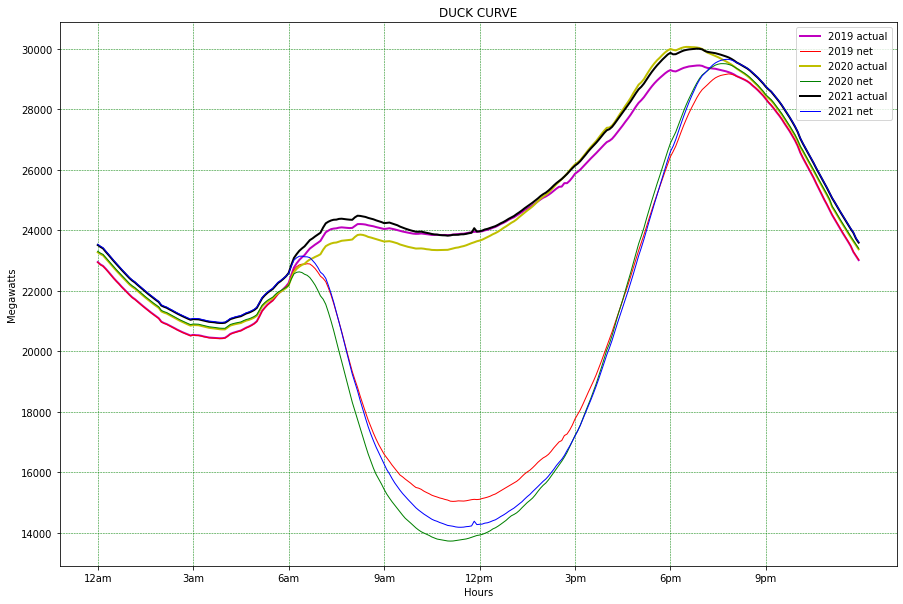

In [ ]:
### PLOTING

plt.figure(figsize=(15, 10))
duck_2019 = (d_2019 - s_2019)
duck_2020 = (d_2020 - s_2020)
duck_2021 = (d_2021 - s_2021)
#2019
plt.plot(d_2019, color='m', linewidth=2)
plt.plot(duck_2019, color='r', linewidth=1)
#2020
plt.plot(d_2020, color='y', linewidth=2)
plt.plot(duck_2020, color='g', linewidth=1)
#2021
plt.plot(d_2021, color='k', linewidth=2)
plt.plot(duck_2021, color='b', linewidth=1)


x_ticks = [0,12*3,12*6,12*9,12*12,12*15,12*18,12*21]
x_labels = ['12am','3am', '6am','9am', '12pm', '3pm','6pm', '9pm']
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Hours')
plt.ylabel('Megawatts')
plt.title('DUCK CURVE')
plt.legend(["2019 actual", "2019 net","2020 actual", "2020 net","2021 actual", "2021 net"], loc='best')
plt.grid(color='g', linestyle='--', linewidth=0.5 )